In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import glob
import re
import io
import os
import sys 
sys.path.append('..')
from brian2 import *
import brian_utils.postproc as bup
import pickle
import random
from collections import OrderedDict
cmaps = OrderedDict()
#matplotlib.style.use('ggplot')

In [35]:
with open(f'/research/harris/prebot_opioid_model/targeted_damgo_sim/seed32-gnap03_con20_vars.pkl','rb') as fid7:
    gleak_mod_data = pickle.load(fid7)
gleak_mod_rate = gleak_mod_data['ratemonitor']
    
with open(f'../cut_connections/cut_T-Q_cons_pkls/high_gleak_pkls/seed4-gleak-03_cut_T-Q_cons_vars.pkl','rb') as fid7:
    high_gleak_data = pickle.load(fid7)
high_gleak_rate = high_gleak_data['ratemonitor']

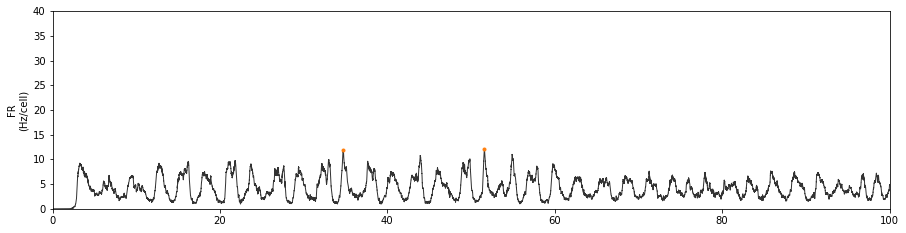

In [38]:
f = plt.figure(figsize=(15,8))
f.tight_layout()
g = f.add_gridspec(2, 1)

height = 4
prominence = 10
binsize = 25 * ms

smoothed_pop_rate = bup.smooth_saved_rate(high_gleak_rate, binsize)
burst_stats = bup.pop_burst_stats(high_gleak_rate['t'], smoothed_pop_rate, height = height, prominence = prominence)
ax = f.add_subplot(g[1,0])
#ax.set_xticks([])
ax.set_xlim(0,100)
ax.set_ylim(0,40)
ax.plot(high_gleak_rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.8)
ax.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "tab:orange")
#ax.set_xlabel('Time (30 s)')
ax.set_ylabel('FR\n(Hz/cell)')

# smoothed_pop_rate = bup.smooth_saved_rate(gleak_mod_rate, binsize)
# burst_stats = bup.pop_burst_stats(gleak_mod_rate['t'], smoothed_pop_rate, height = height, prominence = prominence)
# ax = f.add_subplot(g[0,0])
# #ax.set_xticks([])
# ax.set_xlim(0,100)
# ax.set_ylim(0,50)
# ax.plot(gleak_mod_rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.8)
# ax.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "tab:grey")
# #ax.set_xlabel('Time (30 s)')
# ax.set_ylabel('FR\n(Hz/cell)')
plt.savefig('cut_T-Q_trace.png', dpi=300)


In [16]:
df = pd.read_csv('burst_stats/seed1to40_gleak_burst_stats.csv')
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.5), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.5$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.3), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.3$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.1), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.1$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.1), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.9$'
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.3), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.7$'
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.5), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.5$'

(0.0, 1.0)

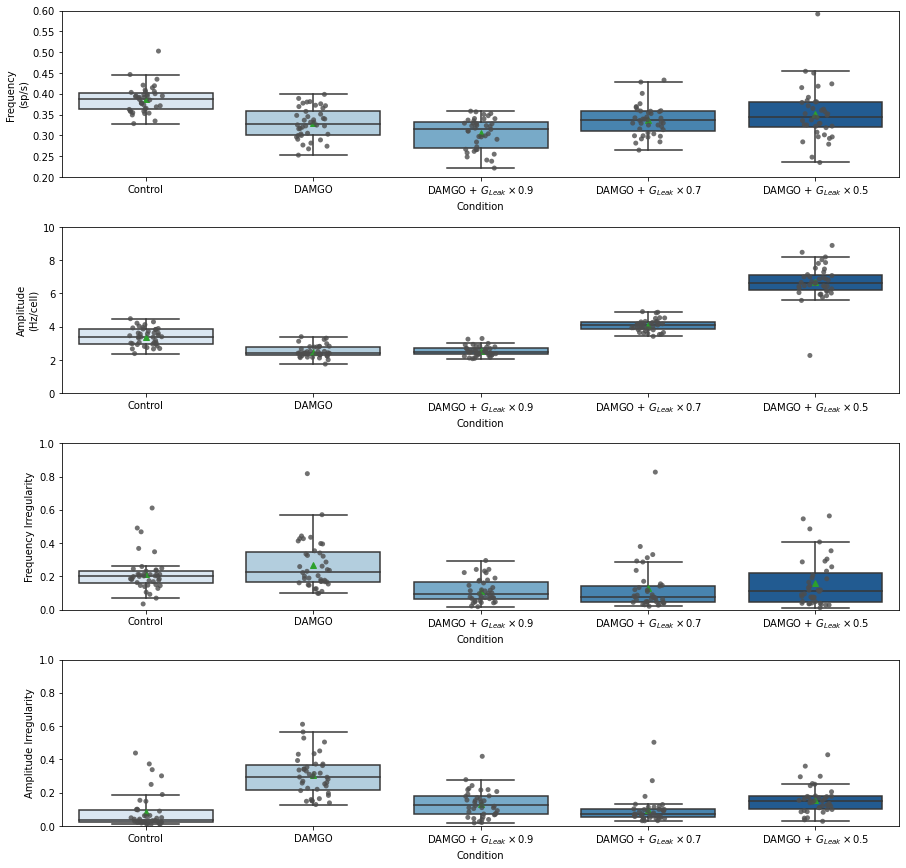

In [17]:
f = plt.figure(figsize=(15,15))
f.tight_layout()
plt.subplots_adjust(hspace=0.3) 
# f = plt.figure(figsize= (5,5))
# f.tight_layout()
g = f.add_gridspec(4, 1)
    
# grab average frequency, amplitude, and width per condition
gleak_df = df
gleak_df = gleak_df[gleak_df['Condition'] != 'Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'Transient']
gleak_df = gleak_df[gleak_df['Condition'] != 'Wash Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'Control Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'DAMGO Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'$G_{Leak}$ Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'DAMGO + $G_{Leak}$ Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'$G_{Leak}$']
gleak_df = gleak_df[gleak_df['Condition'] != 'Wash']
gleak_df = gleak_df[gleak_df['Condition'] != r'DAMGO + $G_{Leak} \times 1.5$']
gleak_df = gleak_df[gleak_df['Condition'] != r'DAMGO + $G_{Leak} \times 1.3$']
gleak_df = gleak_df[gleak_df['Condition'] != r'DAMGO + $G_{Leak} \times 1.1$']

avg_freq_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Frequency']
avg_freq_df = avg_freq_by_seed.to_frame()

avg_amp_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Burst Amp']
avg_amp_df = avg_amp_by_seed.to_frame()

avg_width_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Burst Width']
avg_width_df = avg_width_by_seed.to_frame()

avg_period_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Period']
avg_period_df = avg_period_by_seed.to_frame()

avg_freq_df['Condition'] = avg_freq_df['Frequency'].keys().get_level_values(1)
avg_freq_df

avg_amp_df['Condition'] = avg_amp_df['Burst Amp'].keys().get_level_values(1)
avg_amp_df


ax1 = f.add_subplot(g[0,0])
ax1 = sns.boxplot(data = avg_freq_df, x='Condition', y='Frequency', showmeans = True, showfliers=False, palette="Blues",order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax1 = sns.stripplot(data = avg_freq_df, alpha=0.8, color=".3", x='Condition', y='Frequency', order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
#ax1.set_xlabel('')
#ax1.set_title(r'$G_{Leak}$ str = ' + f'{1.3}')
ax1.set_ylabel('Frequency \n(sp/s)')
ax1.set_ylim(0.2,0.6)



ax2 = f.add_subplot(g[1,0])
ax2 = sns.boxplot(data = avg_amp_df, x='Condition', y='Burst Amp', showmeans = True, showfliers=False, palette="Blues",order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax2 = sns.stripplot(data = avg_amp_df,alpha=0.8, color=".3",x='Condition', y='Burst Amp', order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
# ax2.set_xlabel('')
ax2.set_ylabel('Amplitude\n(Hz/cell)')
# ax2.set_yticks(np.arange(0,6,1))
# ax2.set_title('')
ax2.set_ylim(0,10)

amps = gleak_df.groupby(['run_seed','Condition'])['Burst Amp'].agg(bup.irregularity)
freqs = gleak_df.groupby(['run_seed','Condition'])['Frequency'].agg(bup.irregularity)
amps_df = amps.to_frame()
freqs_df = freqs.to_frame()

amps_df['Condition'] = amps_df['Burst Amp'].keys().get_level_values(1)
freqs_df['Condition'] = freqs_df['Frequency'].keys().get_level_values(1)

ax3 = f.add_subplot(g[2,0])
ax3 = sns.boxplot(data = freqs_df, x='Condition', y='Frequency', showmeans = True, showfliers=False, palette="Blues",order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax3 = sns.stripplot(data = freqs_df, alpha=0.8, color=".3",x='Condition', y='Frequency', order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax3.set_ylabel('Frequency Irregularity')
# ax3.set_ylim(0,)
# ax3.set_title('')
ax3.set_ylim(0,1)

ax4 = f.add_subplot(g[3,0])
ax4 = sns.boxplot(data = amps_df, x='Condition', y='Burst Amp', showmeans = True, showfliers=False, palette="Blues",order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax4 = sns.stripplot(data = amps_df, alpha=0.8, color=".3", x='Condition', y='Burst Amp',order=['Control', 'DAMGO', r'DAMGO + $G_{Leak} \times 0.9$', r'DAMGO + $G_{Leak} \times 0.7$', r'DAMGO + $G_{Leak} \times 0.5$'])
ax4.set_ylabel('Amplitude Irregularity')
ax4.set_ylim(0,1)
# ax4.set_ylim(0,)
# ax4.set_title('')

# plt.savefig('burst_stats/gleak_boxplots.png', dpi=300)
# plt.savefig('burst_stats/gleak_boxplots.pdf')

In [18]:
avg_freq_df.to_csv('burst_stats/gleak_mod_avg_freqs.csv')
avg_amp_df.to_csv('burst_stats/gleak_mod_avg_amps.csv')

freqs_df = freqs_df.rename(columns={'Frequency': 'Frequency Irregularity'})
freqs_df.to_csv('burst_stats/gleak_mod_freq_irreg.csv')
amps_df = amps_df.rename(columns={'Burst Amp': 'Amplitude Irregularity'})
amps_df.to_csv('burst_stats/gleak_mod_amp_irreg.csv')


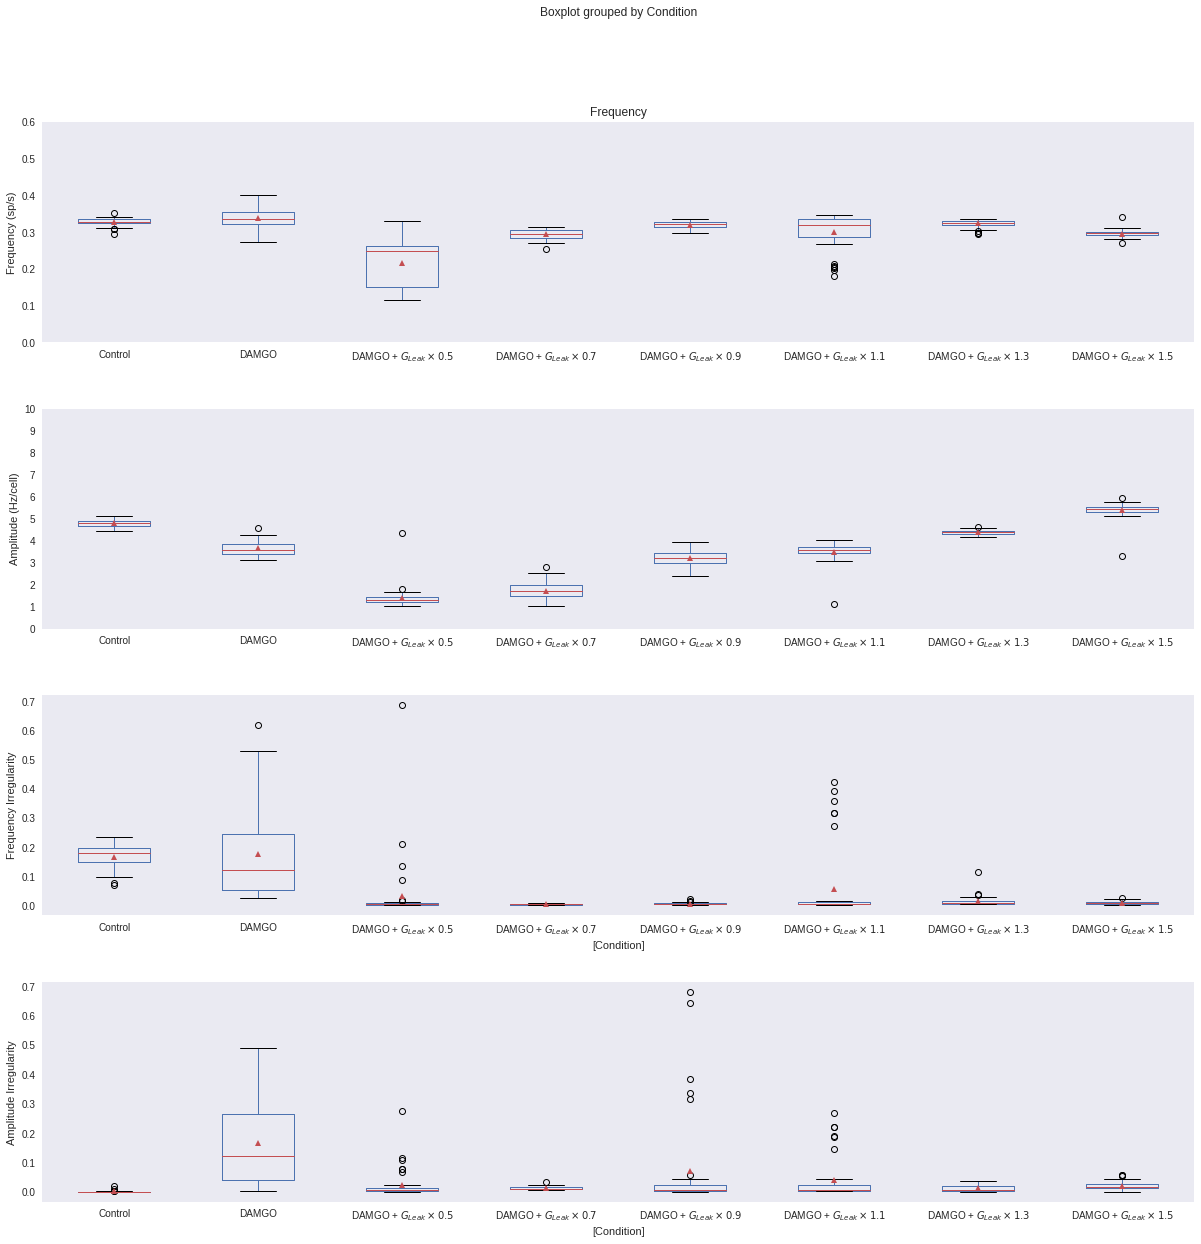

In [99]:
df = pd.read_csv('seed1to40_high_con_burst_stats.csv')
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.5), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.5$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.3), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.7$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == 0.1), 'Condition'] = r'DAMGO + $G_{Leak} \times 0.9$' 
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.1), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.1$'
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.3), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.3$'
df.loc[(df['Condition'] == r'DAMGO + $G_{Leak}$') & (df[r'$G_{Leak}$ str'] == -0.5), 'Condition'] = r'DAMGO + $G_{Leak} \times 1.5$'

f, axes = plt.subplots(4,1, figsize=(20,20))
f.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.style.use('seaborn')
# f = plt.figure(figsize= (5,5))
# f.tight_layout()
# g = f.add_gridspec(4, 1)
    
# grab average frequency, amplitude, and width per condition
gleak_df = df
gleak_df = gleak_df[gleak_df['Condition'] != 'Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'Transient']
gleak_df = gleak_df[gleak_df['Condition'] != 'Wash Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'Control Block']
gleak_df = gleak_df[gleak_df['Condition'] != 'DAMGO Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'$G_{Leak}$ Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'DAMGO + $G_{Leak}$ Block']
gleak_df = gleak_df[gleak_df['Condition'] != r'$G_{Leak}$']
gleak_df = gleak_df[gleak_df['Condition'] != 'Wash']

avg_freq_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Frequency']
avg_freq_df = avg_freq_by_seed.to_frame()

avg_amp_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Burst Amp']
avg_amp_df = avg_amp_by_seed.to_frame()

avg_width_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Burst Width']
avg_width_df = avg_width_by_seed.to_frame()

avg_period_by_seed = gleak_df.groupby(['run_seed', 'Condition']).mean()['Period']
avg_period_df = avg_period_by_seed.to_frame()

#ax1 = f.add_subplot(g[0,0])
ax1 = avg_freq_df.boxplot(by = 'Condition', ax = axes[0], grid = False, showmeans = True)
ax1.set_xlabel('')
#ax1.set_title(r'$G_{Leak}$ str = ' + f'{1.3}')
ax1.set_ylabel('Frequency (sp/s)')
ax1.set_yticks(np.arange(0,0.7,0.1))
#ax1.set_ylim(0,0.7)

#ax2 = f.add_subplot(g[1,0])
ax2 = avg_amp_df.boxplot(by = 'Condition', ax = axes[1], grid = False, showmeans = True)
ax2.set_xlabel('')
ax2.set_ylabel('Amplitude (Hz/cell)')
ax2.set_yticks(np.arange(0,11,1))
ax2.set_title('')

amps = gleak_df.groupby(['run_seed','Condition'])['Burst Amp'].agg(bup.irregularity)
freqs = gleak_df.groupby(['run_seed','Condition'])['Frequency'].agg(bup.irregularity)

amps_df = amps.to_frame()
freqs_df = freqs.to_frame()

#ax3 = f.add_subplot(g[2,0])
ax3 = freqs_df.boxplot(by = 'Condition', ax = axes[2], grid = False, showmeans = True)
ax3.set_ylabel('Frequency Irregularity')
#ax3.set_ylim(0,)
ax3.set_title('')

#ax4 = f.add_subplot(g[3,0])
ax4 = amps_df.boxplot(by = 'Condition', ax = axes[3], grid = False, showmeans = True)
ax4.set_ylabel('Amplitude Irregularity')
#ax4.set_ylim(0,)
ax4.set_title('')

plt.savefig('high_con_boxplots.png', dpi=300)
plt.savefig('high_con_boxplots.pdf')